In [1]:
%%bash
source activate basemap

lat =  35.690155 42.136677
lon =  -124.45009 -113.741455
(169, 215, 24, 21)
wrfout_d01_2013-08-22_00:00:00
tr17_1 Max =  0.0
tr17_2 Max =  0.0
tr17_3 Max =  0.0
tr17_4 Max =  0.0
tr17_5 Max =  0.0
tr17_6 Max =  0.0
tr17_7 Max =  0.0
tr17_8 Max =  0.0
tr17_9 Max =  0.0
tr17_10 Max =  0.0
tr17_11 Max =  0.0
tr17_12 Max =  0.0
tr17_13 Max =  0.0
tr17_14 Max =  0.0
tr17_15 Max =  0.0
tr17_16 Max =  0.0
tr17_17 Max =  0.0
tr17_18 Max =  0.0
tr17_19 Max =  0.0
tr17_20 Max =  0.0
wrfout_d01_2013-08-22_01:00:00
tr17_1 Max =  1.0000017307276732e-12
tr17_2 Max =  1.0000017307276732e-12
tr17_3 Max =  1.0000017307276732e-12
tr17_4 Max =  1.0000017307276732e-12
tr17_5 Max =  1.0000017307276732e-12
tr17_6 Max =  1.0000017307276732e-12
tr17_7 Max =  1.0000017307276732e-12
tr17_8 Max =  1.0000017307276732e-12
tr17_9 Max =  1.0000017307276732e-12
tr17_10 Max =  1.0000017307276732e-12
tr17_11 Max =  1.0000017307276732e-12
tr17_12 Max =  1.0000017307276732e-12
tr17_13 Max =  1.0000017307276732e-12
tr17_1

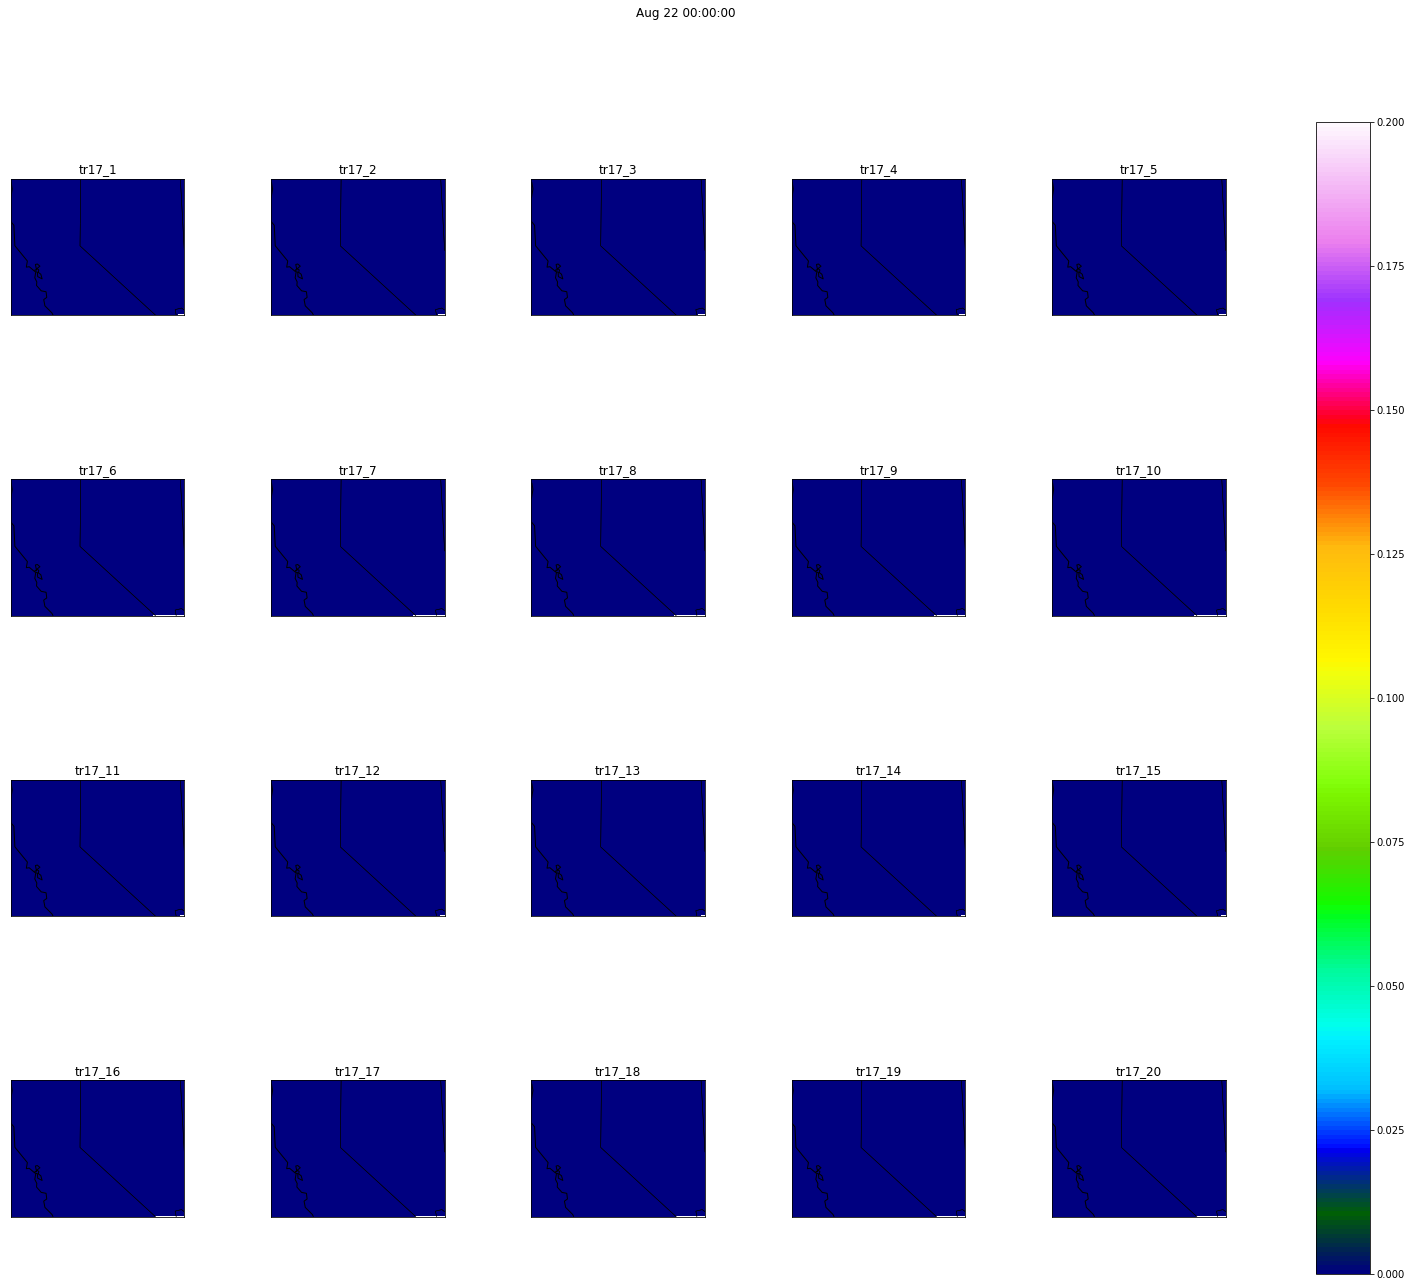

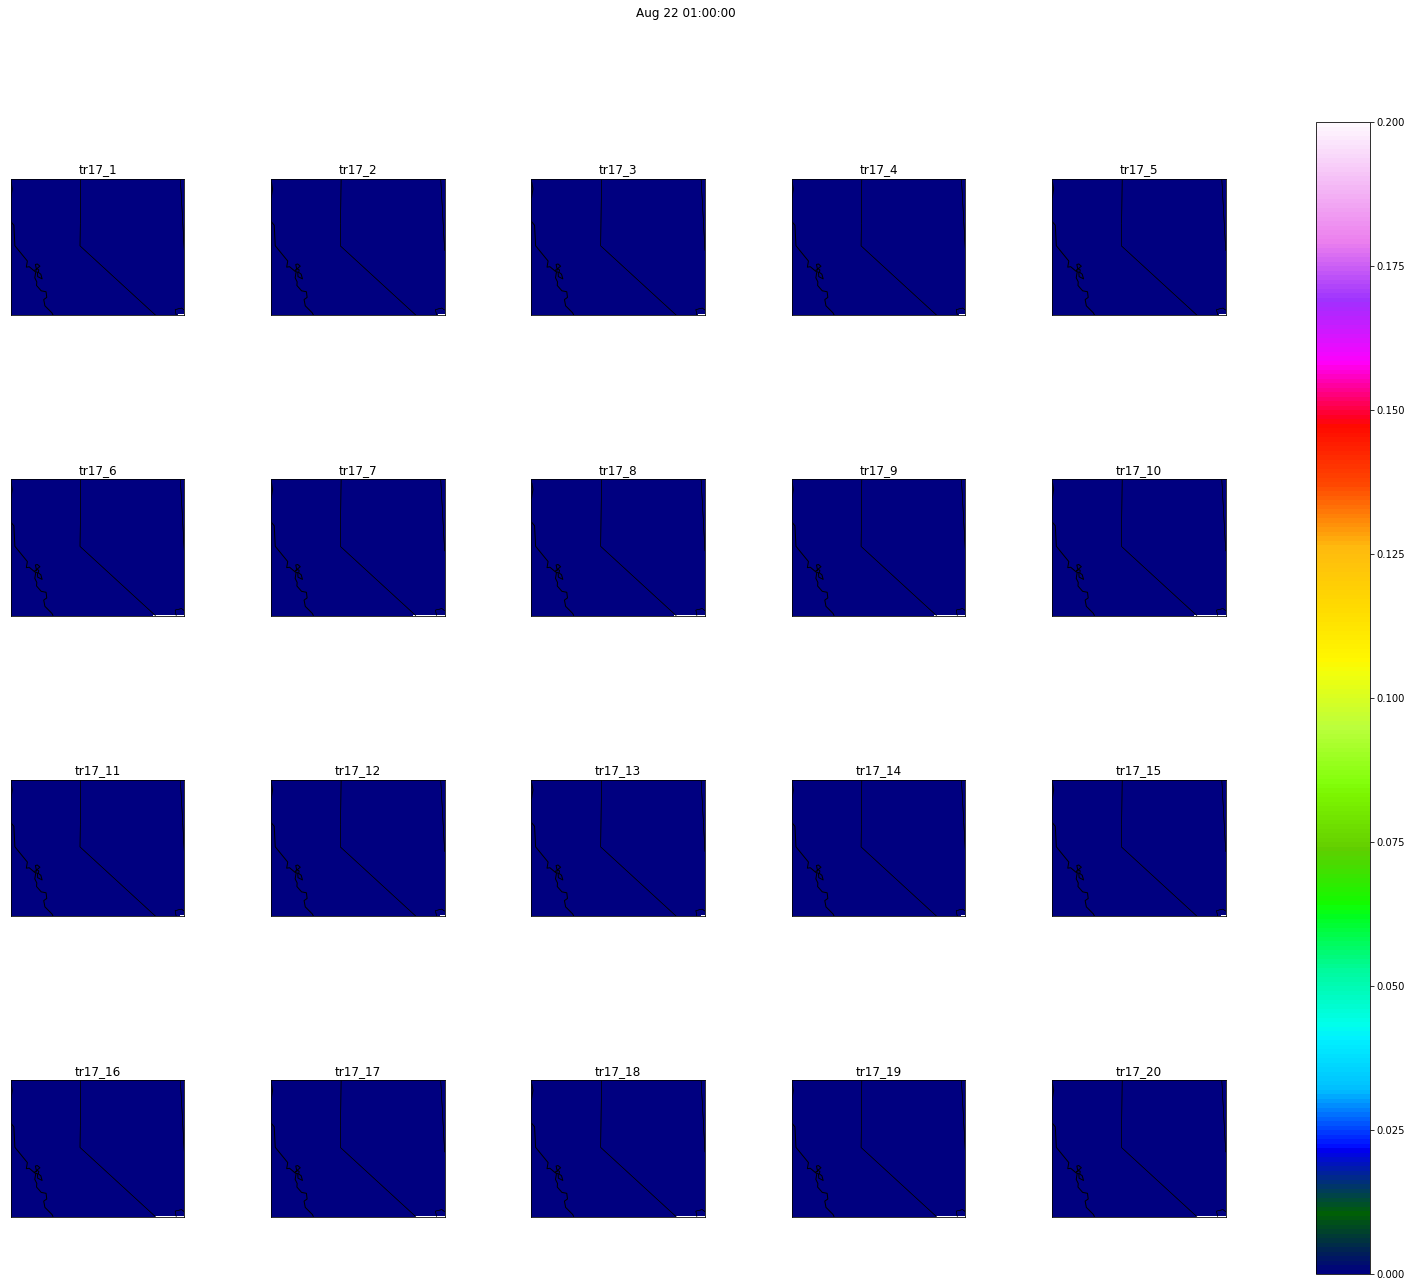

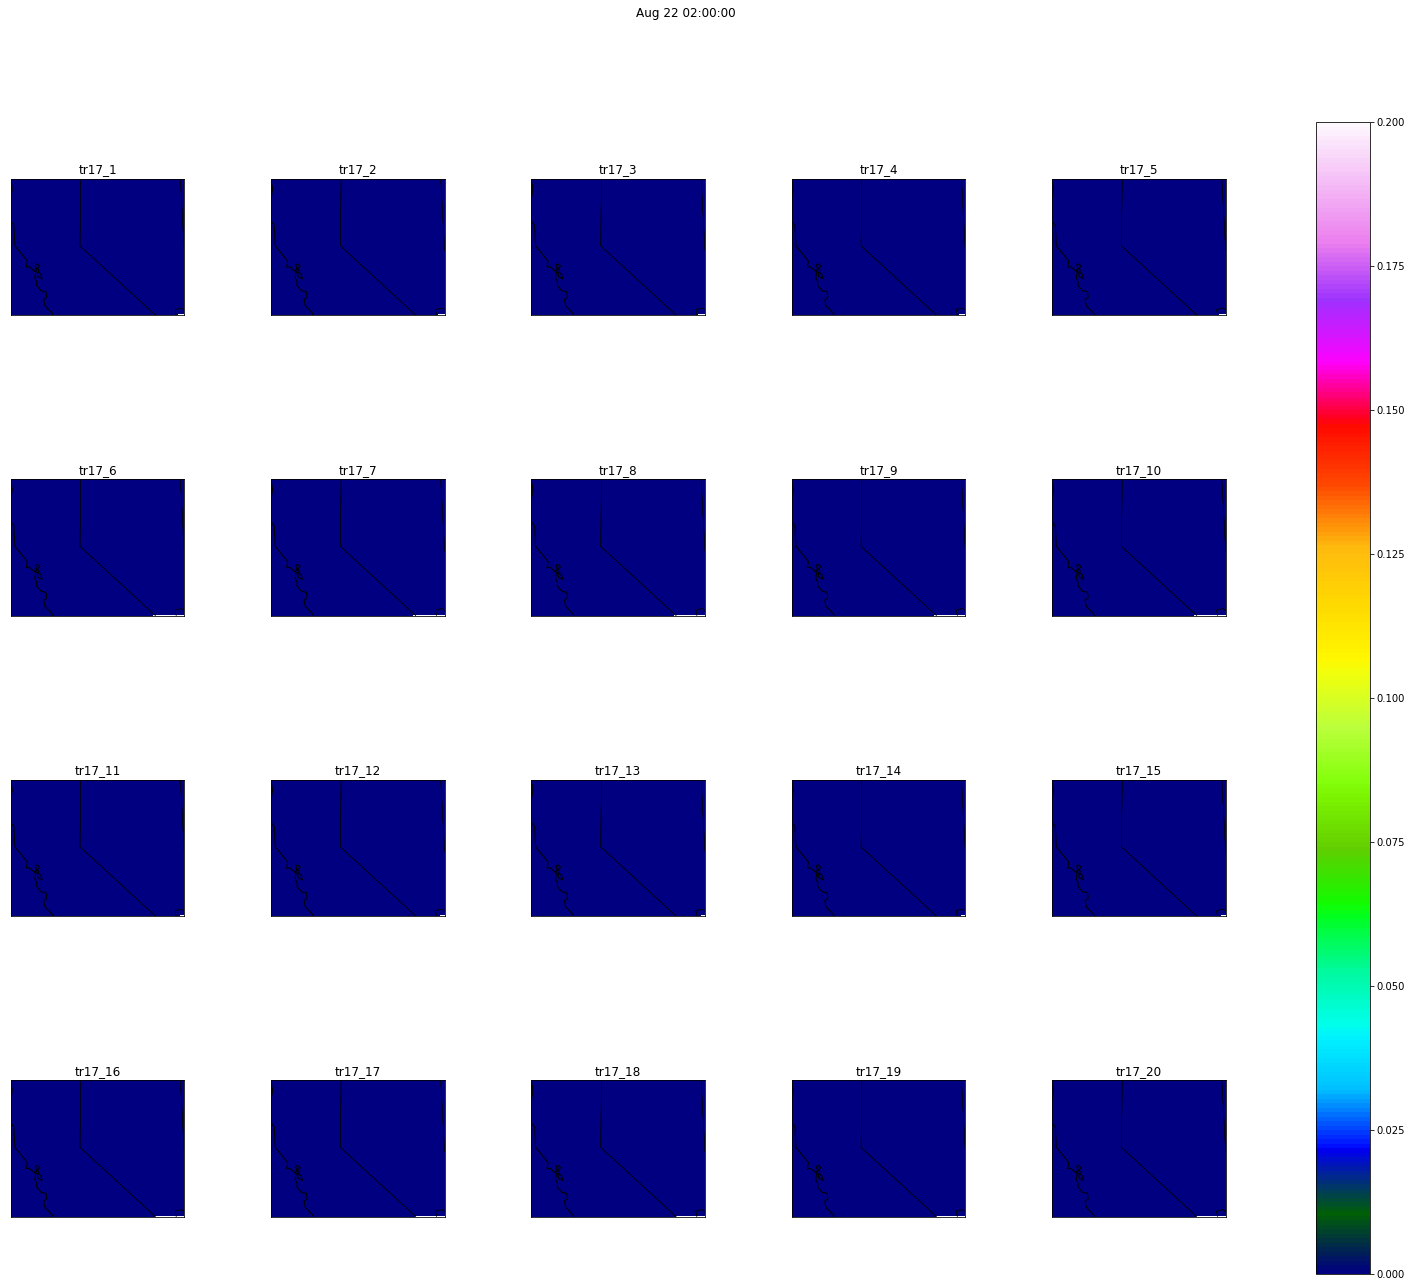

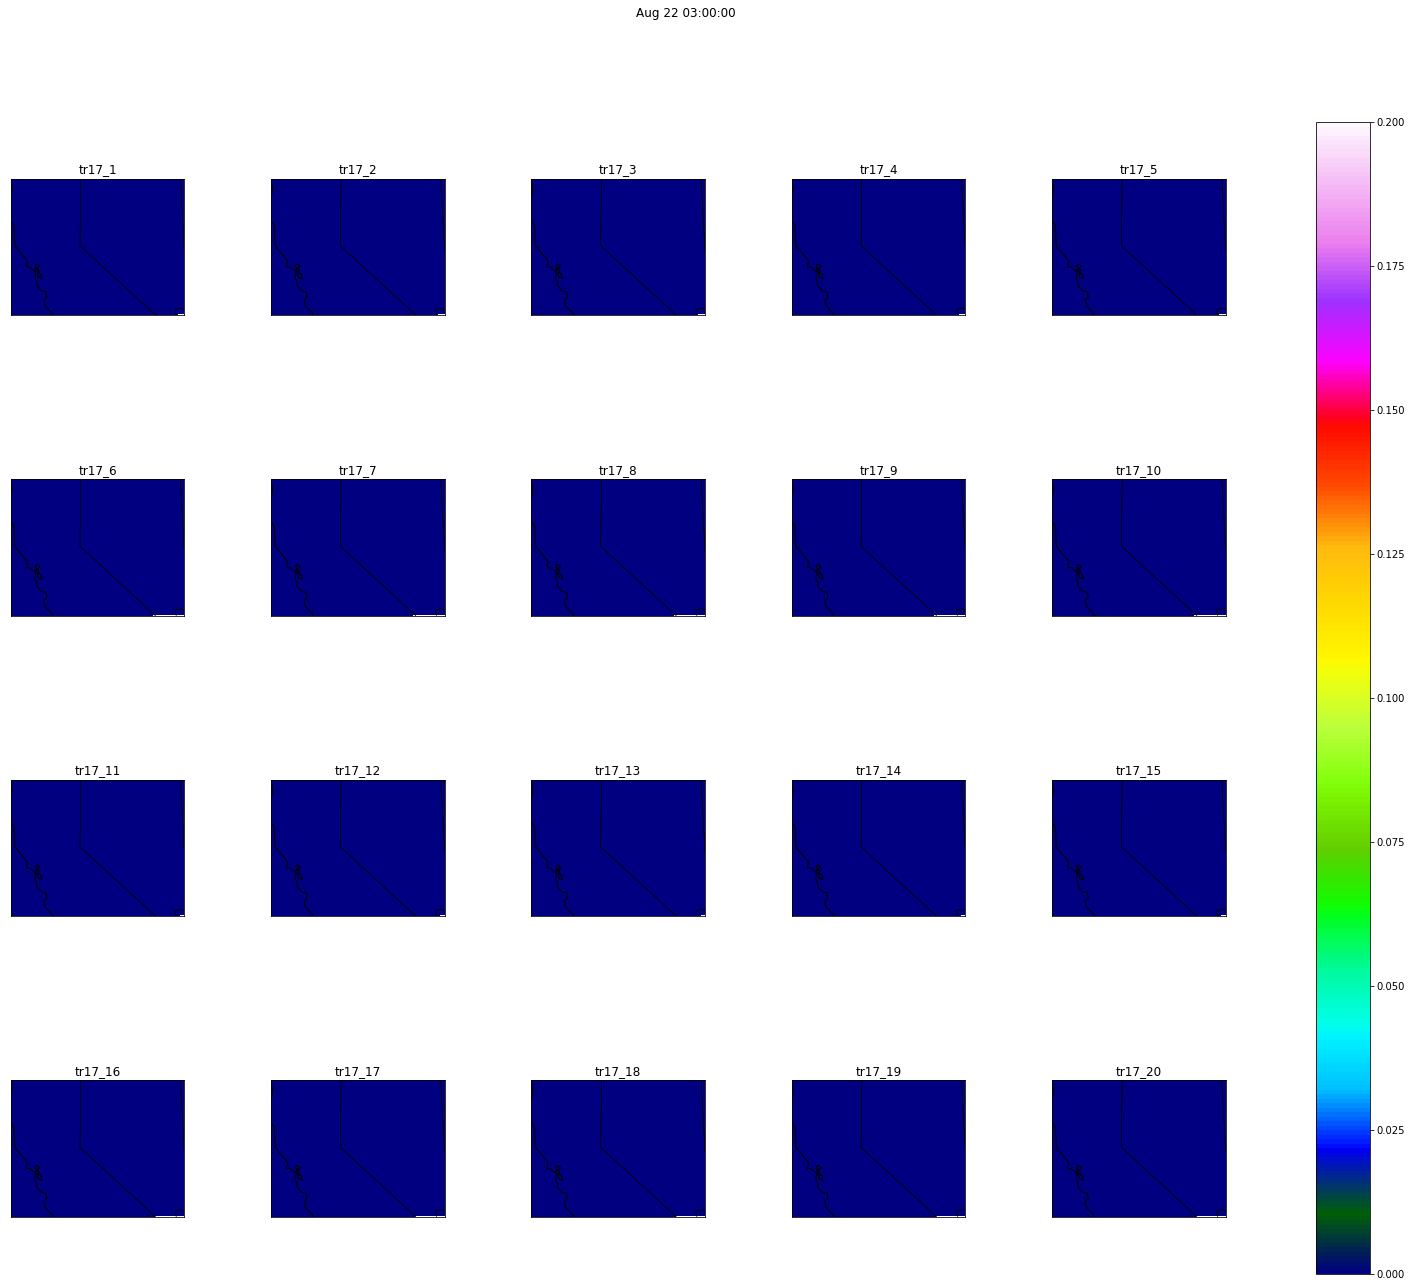

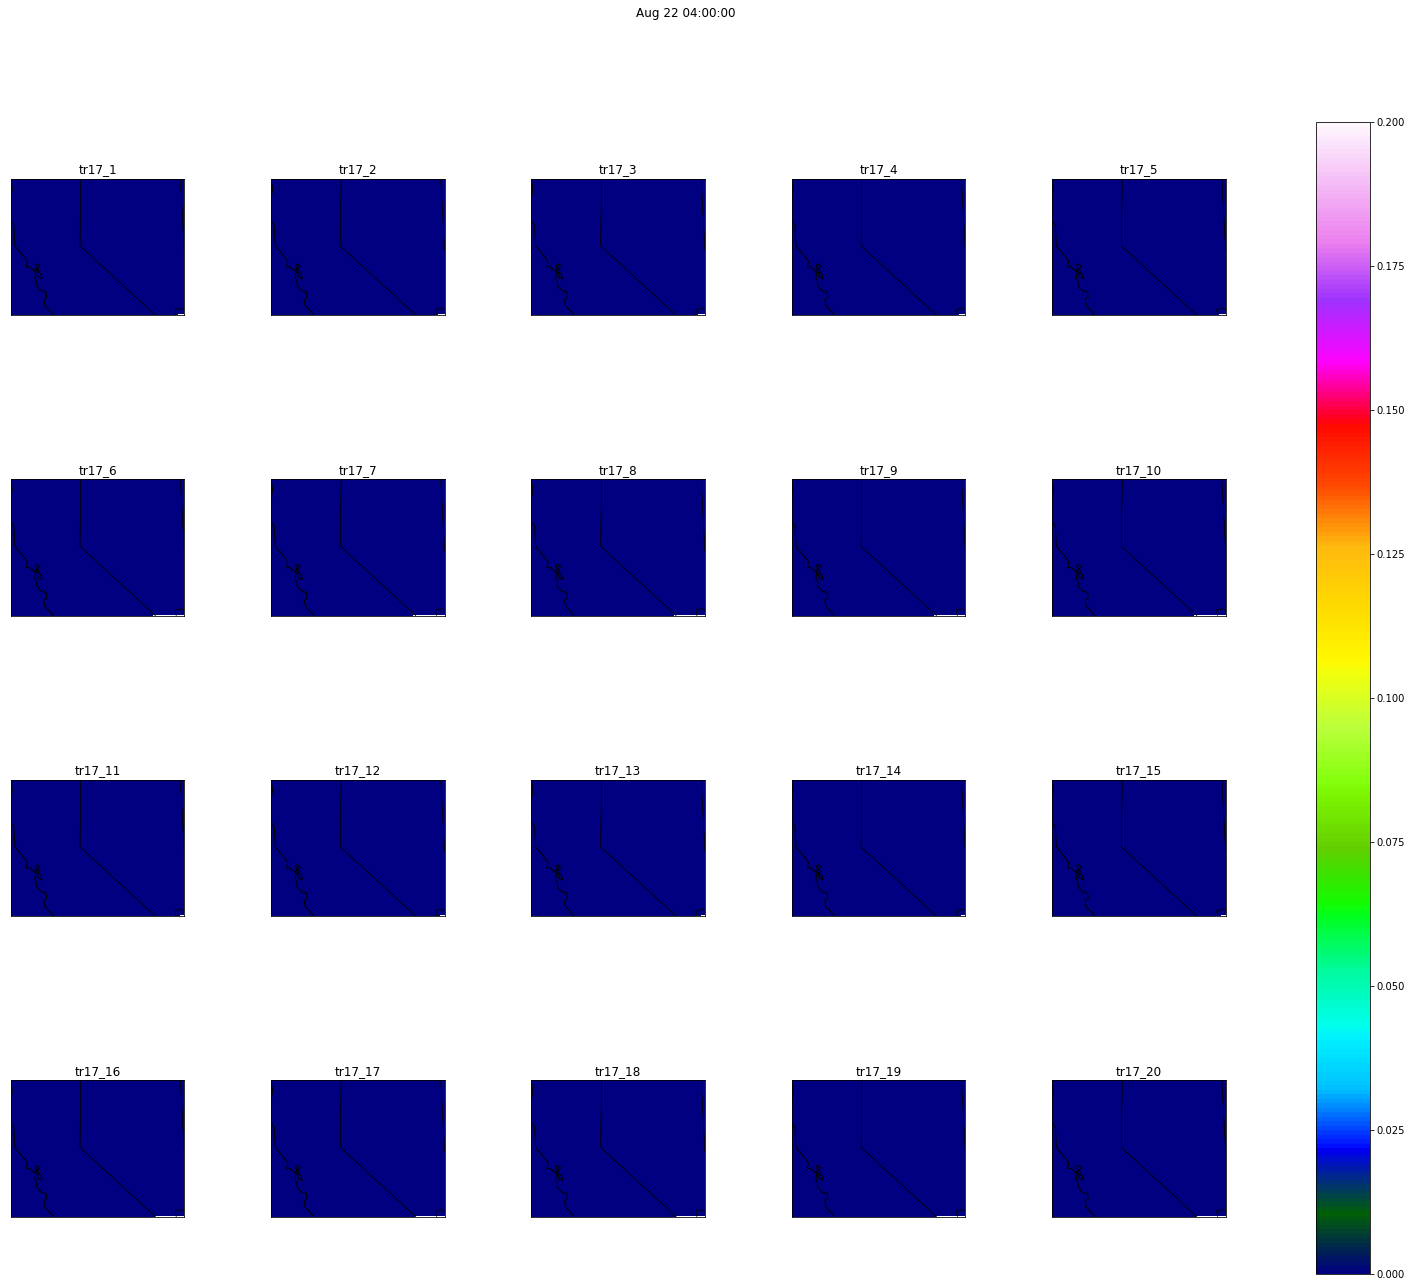

In [27]:
# This code plots emission data from netCDF files

# Import necessary libraries
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap
from time import sleep
from matplotlib import animation
import warnings
warnings.filterwarnings('ignore')

# Get Lat Lon data
out1 = Dataset('wrfinput_d01', mode='r')
lon = out1.variables['XLONG'][0][:]
lat = out1.variables['XLAT'][0][:]
out1.close()
lon0 = lon.mean()
lat0 = lat.mean()
latmax = lat.max()
latmin = lat.min()
lonmax = lon.max()
lonmin = lon.min()
print('lat = ', latmin, latmax)
print('lon = ', lonmin, lonmax)

m = Basemap(width=4000*215,height=4000*169, projection='lcc',resolution = 'l',lat_0=lat0,lon_0=lon0)
xi, yi = m(lon,lat)

def makemap(tra):
    m.drawstates()
    m.drawcoastlines()
    m.pcolor(xi,yi,tra, cmap='gist_ncar');
    
pref = 'wrfout_d01_2013-08-'
suff = ':00:00'
I = 169 # Meridional (NS) grid points
J = 215 # Zonal (EW) grid points 
H = 24 # Hours
T = 20+1 # Tracers
N = 4 # Vertical  subplot number
M = 5 # Horizontal subplot numer
tr=np.empty([I,J,H,T])

print(tr.shape)

# vmax = np.max(out.variables[trname])

for i in range(22,23): # Dates
    for j in range(0,5): # Hours
        outname = pref+str(i)+"_%02d" %j + suff
        print(outname)
        fig,axs = plt.subplots(N,M,figsize=(25,20))
        caxx = fig.add_axes([0.85,0.1,0.03,0.8])
        plt.subplots_adjust(wspace=0.5, right=0.8, top=0.9, bottom=0.1)
        fig.suptitle('Aug ' + str(i) + " %02d" %j + ':00:00')
        out = Dataset(outname, mode='r')
        for q in range(1,T): # Tracer
            trname='tr17_'+str(q)
            tr[:,:,j,q] = out.variables[trname][0][0][:]
            print(trname, 'Max = ', np.amax(tr[:,:,j,q]))
            plt.subplot(N,M,q)
            plt.title(trname)
            makemap(tr[:,:,j,q])
            plt.clim(vmin=0, vmax=0.2)
#         vmin = np.min(tr[:,:,j,:])
#         vmax = np.max(tr[:,:,j,:])
#         norm = colors.Normalize(vmin=vmin, vmax=vmax)
#         fig.colorbar(extend='max')
        out.close()
        picname = 'fig_ebu'+"%02d" %j+'.png'
        plt.colorbar(cax=caxx, ax=axs)
        
        plt.savefig(picname)

# print('tmax =', tr.max())
# print('tmin = ', tr.min())

In [21]:
tr = np.empty([169,215,24,21])
for i in range(22,23): # Dates
    for j in range(5,24): # Hours
        outname = pref+str(i)+"_%02d" %j + suff
        out = Dataset(outname, mode='r')
        for k in range(1,21): # Tracer
            trname='tr17_'+str(k)
            tr[:,:,j,k] = out.variables[trname][0][0][:]
        out.close()
print(np.max(tr))
# for i in range(22,23):
#     for j in range(0,24):
#         for k in range(1,21):
#             tr[:,:,j,k] = out.variables[tr_name]
            
            

0.20959725975990295
